In [599]:
class Individual(object,):
    
    def __init__(self,Chromosome=0,Fitness=0):
        self.Chromosome=Chromosome
        self.Fitness=Fitness
    
    def Create(self,dim,R):   # create chromosome of dim elements in the range of a and b
        self.Chromosome=np.empty([1,dim])
        for i in range(0,dim):
            self.Chromosome[0,i]=(R[i,1]-R[i,0])*np.random.rand()+R[i,0]
    
    def Crossover(self,other):
        child1=Individual()
        child2=Individual()
        alpha=np.random.rand()
        child1.Chromosome=(alpha)*(self.Chromosome)+(1-alpha)*(other.Chromosome)
        child2.Chromosome=(1-alpha)*(self.Chromosome)+(alpha)*(other.Chromosome)
        return child1, child2
        
    
    def Mutation(self,R):
        mutant=self
        d=np.random.random_integers(0,dim-1)  #dim_of_mutation=
        mut_range=0.1*(R[d,1]-R[d,0])
        self.Chromosome[0,d]= self.Chromosome[0,d]+mut_range*(np.random.rand()-0.5)
        return mutant
        
    
    def __str__(self):
        return str((self.Chromosome,self.Fitness))
    

In [630]:
s = str('x1**2+sin(x2)')
f = sympy.sympify(s)
R=np.array([[-5,5],[-6,6]])

NumGen=1000
PopSize=100

In [631]:
Population=[]
#Fitness=[]

Fitness=np.empty(shape=[1, PopSize]) 
MinFit=np.empty(shape=[1, NumGen])
MaxFit=np.empty(shape=[1, NumGen])
AverageFit=np.empty(shape=[1, NumGen])
    
for i in range(0,PopSize):
    p=Individual()
    p.Create(dim,R)
    Population.append(p)  #.Chromosome
    #Fitness.append(f.evalf(subs={'x1':p.Chromosome[0,0], 'x2':p.Chromosome[0,1]}))
    #np.concatenate(Fitness,f.evalf(subs={'x1':p.Chromosome[0,0], 'x2':p.Chromosome[0,1]}))
    Fitness[0,i]=f.evalf(subs={'x1':p.Chromosome[0,0], 'x2':p.Chromosome[0,1]})
    
for n in range(0,NumGen):
    index1=np.random.random_integers(0,PopSize-1)
    index2=np.random.random_integers(0,PopSize-1)
       
    parent1=Population[index1]
    parent2=Population[index2]
    
    #print(parent1)
    #print(parent2)
    
    child1, child2 = parent1.Crossover(parent2)
    
    #print(child1)
    #print(child2)
    
    child1=child1.Mutation(R)
    child2=child2.Mutation(R)
    
    #print(child1)
    #print(child2)
    
    fitness_Child1=f.evalf(subs={'x1':child1.Chromosome[0,0], 'x2':child1.Chromosome[0,1]})
    fitness_Child2=f.evalf(subs={'x1':child2.Chromosome[0,0], 'x2':child2.Chromosome[0,1]})
    
    #print(fitness_Child1)
    #print(fitness_Child2)
    
    
    # Replace worse
    index_worst=np.argsort(-Fitness)[0,0:2]
    
    Population[index_worst[0]].Chromosome=child1.Chromosome
    Fitness[0,index_worst[0]]=fitness_Child1
    Population[index_worst[1]].Chromosome=child2.Chromosome
    Fitness[0,index_worst[1]]=fitness_Child1
    
    MinFit[0,n]=np.min(Fitness)
    MaxFit[0,n]=np.max(Fitness)
    AverageFit[0,n]=np.average(Fitness)

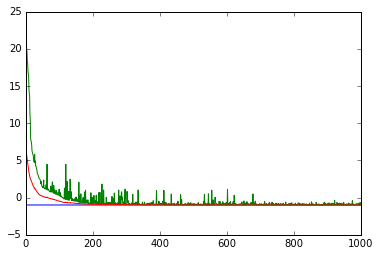

In [632]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.0, NumGen, 1)

plt.plot(t,MinFit[0,:])
plt.plot(t,MaxFit[0,:])
plt.plot(t,AverageFit[0,:])

In [633]:
np.min(Fitness)

-0.99998474032788387

In [612]:

import matplotlib as plt
%matplotlib inline
from matplotlib import figure

fig = figure.Figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')


x=np.arange(R[0,0], R[0,1] ,0.05)
y = np.arange(R[1,0], R[1,1], 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([x**2+np.sin(y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

ValueError: Unknown projection '3d'